# Titanic: Machine Learning from Disaster - Kaggle Competition

[Kaggle](https://www.kaggle.com/c/titanic/data) has created a competition to predict who survived based off data about Titanic's passengers. The data is divided into two files: train and test. The train dataset contains the column of who survied, while the test dataset does not.

I will explore the features for a better understanding of the dataset and manipulate feature's to improve the quaility of the predictions.





[Data Exploration](#explore)
>  -  [Survived](#survived)
>  -  [Pclass](#pclass)
>  -  [Name](#name)
>  -  [Sex](#sex)
>  -  [Age](#age)
>  -  [Title](#title)
>  -  [Siblings, Spouses, Parents, and Children](#sibsp)
>  -  [Ticket](#ticket)
>  -  [Fare](#fare)
>  -  [Cabin](#cabin)
>  -  [Embarked](#Embarked)

[Data Preperation](#preperation)

[Data Predictions](#predictions)
>  -  [Logistic Regression](#log)
>  -  [ElasticNet](#en)
>  -  [Support Vector Classifier](#svc)
>  -  [Random Forest Classifier](#rfc)
>  -  [KNeighbors Classifier](#knn)
>  -  [Coefficients](#coeff)

[Prediction for Test Set](#test)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print(train.shape)
train.head()
#891 Passengers, 12 Columns

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


I will remove PassengerId from the train set becuase it is unique to this dataset and should have no positive predictive impact. It is needed for submitting the test set predictions though.

My first intuition about each column is listed color coded below:
-  <font color=blue>**Blue:**</font> This is our target column we are trying to predict
-  <font color=green>**Green:**</font> I believe these are most likely to have had a significant impact on the survival rate of the passengers
-  <font color=red>**Red**</font>: I am unsure that these will help our predictive model, the way they are. I will either transform them into a better feature or remove them.

|** Variable**| **Definition**|	**Key**|
|-------------|
|<font color=blue>survival|	 <font color=blue>Survival|	 <font color=blue>0 = No, 1 = Yes </font>
|<font color=green>pclass	|<font color=green>Ticket class|<font color=green>	1 = 1st (Upper Class), 2 = 2nd(Middle Class), 3 = 3rd(Lower Class)
|<font color=red>Name	||<font color=red>Name of Passenger with Title|
|<font color=green>sex|	<font color=green>Sex	|
|<font color=green>Age	|<font color=green>Age in years	|
|<font color=red>sibsp||<font color=red>	# of siblings / spouses aboard the Titanic|	
|<font color=red>parch	||<font color=red># of parents / children aboard the Titanic	|
|<font color=red>ticket||<font color=red>	Ticket number|	
|<font color=red>fare	||<font color=red>Passenger fare|	
|<font color=red>cabin	|<font color=red>Cabin number|	
|<font color=green>embarked	|<font color=green>Port of Embarkation|<font color=green>	C = Cherbourg, Q = Queenstown, S = Southampton|

In [5]:
train = train.drop('PassengerId',axis=1) #Dropping PassengerId column (10 feature columns remain)

In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
print(train.isnull().sum())
#687 out of 891 passengers have missing Cabin information (Over 77%). 
#We will have to see if this feautre will provide any useful prediction power with some data manifupaltion


#For the missing values of 'Age', we can impute that once we explore / transform the rest of the columns


#Embarked only has 2 missing values, so it is best to just drop those two values
print('\n')
print(test.isnull().sum())

#We can impute 'Age', the same as we will do for the train dataframe

#The 1 missing 'Fare' row, we can impute the mean of the Pclass it is in

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
train = train.dropna(subset=['Embarked'])

In [10]:
print('Train Dataframe', '\n') 
print(train.isnull().sum())
print('\n')
print('Test Dataframe', '\n') 
print(test.isnull().sum())


Train Dataframe 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64


Test Dataframe 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<a id='explore'></a>
## <font color = 'Blue'> Data Exploration</font>

<a id='survived'></a>

### Survived (Target Class)

count    889.000000
mean       0.382452
std        0.486260
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64 

0    549
1    340
Name: Survived, dtype: int64 



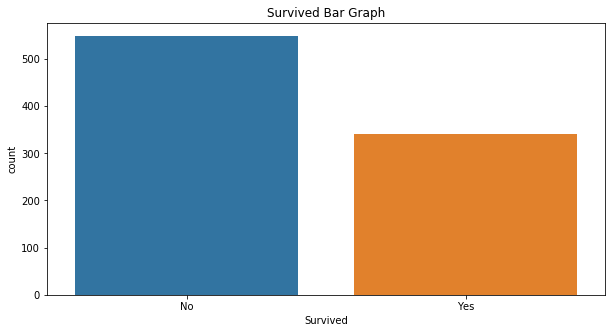

In [11]:
fig = plt.figure(figsize = (10,5))
g = sns.countplot(x='Survived', data = train)
plt.title('Survived Bar Graph')
plt.xticks(np.arange(2), ('No','Yes'))
print(train['Survived'].describe(),'\n')
print(train['Survived'].value_counts(),'\n')

#38% Survived 340 out of 891

<a id='pclass'></a>
### PClass 

In [12]:
train['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

Text(0.5,1,'Percentage Survived by Ticket Class')

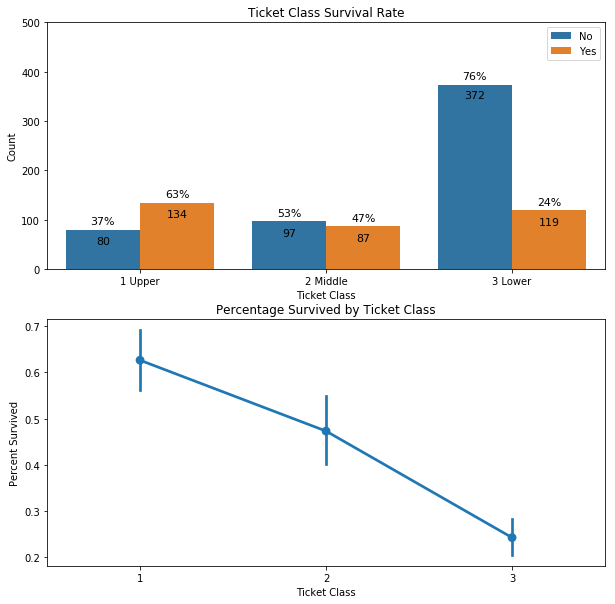

In [13]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'Pclass', hue = 'Survived', data = train)
ax1.set_title('Ticket Class Survival Rate')
ax1.set_xticklabels(['1 Upper','2 Middle','3 Lower'])
ax1.set_ylim(0,500)
ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'])


height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax1.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax1.patches): 
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 - 30,
           '{:.0f}'.format(height[i]), ha="center", size=11)

ax2 = plt.subplot(2,1,2)
sns.pointplot(x='Pclass', y='Survived', data=train)
ax2.set_xlabel('Ticket Class')
ax2.set_ylabel('Percent Survived')
ax2.set_title('Percentage Survived by Ticket Class')




<a id='name'></a>
### Name

The names by themselves are not very helpful. We could search by family name and see if familys had a better/worse chance of surviving, but there are other features that would be simplier to use (Parch/Sibsp).

I believe it may be worth the effort to pull the titles from the names. This will allow us another useful feature to impute the missing ages.

In [14]:
train['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [15]:
# Creating a class to pull the title from the name
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

In [16]:
#Create a list of each title for each dataset
titles_train = sorted(set([x for x in train['Name'].map(lambda x: get_title(x))]))
titles_test = sorted(set([x for x in test['Name'].map(lambda x: get_title(x))]))

In [17]:
# This will give us a list of the titles for each dataset
print(len(titles_train), ':', titles_train)
print(len(titles_test),':', titles_test)

17 : ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess']
9 : ['Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev']


In [18]:
#This class will change any title into 1 on 4 based on Sex and Age. 
#We could add in status two more groups for high status and sex, but we have enough features that tell us about status (Pclass/Fare)
def adjust_titles(x):
    title = x['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [19]:
train['Title'] = train['Name'].map(lambda x: get_title(x))
train['Title'] = train.apply(adjust_titles, axis=1)
test['Title'] = test['Name'].map(lambda x: get_title(x))
test['Title'] = test.apply(adjust_titles, axis=1)

In [20]:
print(train['Title'].value_counts())
print('\n')
print(test['Title'].value_counts())

Mr        537
Miss      184
Mrs       128
Master     40
Name: Title, dtype: int64


Mr        245
Miss       79
Mrs        73
Master     21
Name: Title, dtype: int64


<i>Now we can drop the name column</i>

In [21]:
train = train.drop('Name', axis = 1)
test = test.drop('Name',axis=1)

<a id='sex'></a>
### Sex

Nothing needs to be changed for this feature. 

In [22]:
train['Sex'].head(3)

0      male
1    female
2    female
Name: Sex, dtype: object

Text(0.5,1,'Percentage Survived by Ticket Class')

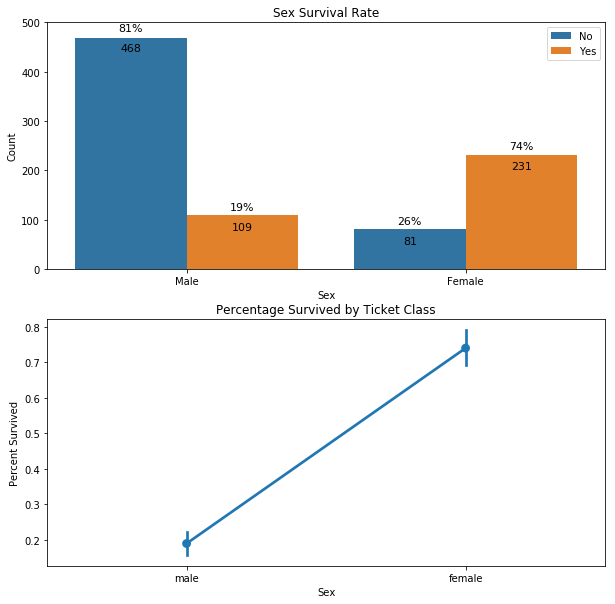

In [23]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'Sex', hue = 'Survived', data = train)
ax1.set_title('Sex Survival Rate')
ax1.set_xticklabels(['Male','Female'])
ax1.set_ylim(0,500)
ax1.set_xlabel('Sex')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'])


height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax1.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax1.patches): 
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 - 30,
           '{:.0f}'.format(height[i]), ha="center", size=11)

ax2 = plt.subplot(2,1,2)
sns.pointplot(x='Sex', y='Survived', data=train)
ax2.set_xlabel('Sex')
ax2.set_ylabel('Percent Survived')
ax2.set_title('Percentage Survived by Ticket Class')

19% Survival rating for men compared to 74% for female.

<a id='age'></a>
### Age

In [24]:
print('Train: ',pd.isnull(train['Age']).sum(),' Test: ', pd.isnull(test['Age']).sum())

Train:  177  Test:  86


In [25]:
#We will impute using Pclass and Title because these are very telling features
print('Titles:', '\n', train['Title'].value_counts())
print('\n') 
print('Pclass:', '\n',train['Pclass'].value_counts())

Titles: 
 Mr        537
Miss      184
Mrs       128
Master     40
Name: Title, dtype: int64


Pclass: 
 3    491
1    214
2    184
Name: Pclass, dtype: int64


In [26]:
#Help us decide to impute with Mean or Median
print(train['Age'].describe(exclude='NaN'))

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [27]:
#Might be better to use the median, due to the large amount around 30
train['Age'] = train.groupby(['Pclass','Title'])['Age'].apply(lambda x: x.fillna(x.median()))
test['Age'] = test.groupby(['Pclass','Title'])['Age'].apply(lambda x: x.fillna(x.median()))

In [28]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

In [29]:
print(train['Age'].describe())

count    889.000000
mean      29.125613
std       13.488560
min        0.420000
25%       21.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


<a id='title'></a>
### Title 

Text(0.5,1,'Percentage Survived by Title')

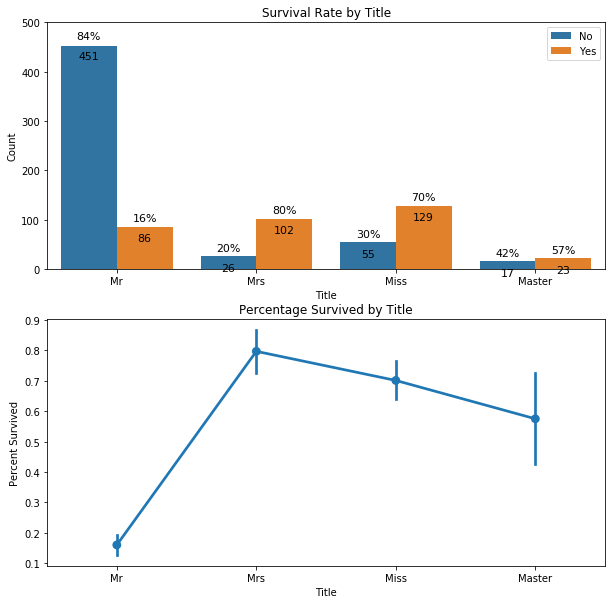

In [30]:
fig = plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
ax1 = sns.countplot(x = 'Title', hue = 'Survived', data = train)
ax1.set_title('Survival Rate by Title')
ax1.set_ylim(0,500)
ax1.set_xlabel('Title')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'])


height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax1.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax1.patches): 
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 - 30,
           '{:.0f}'.format(height[i]), ha="center", size=11)

ax2 = plt.subplot(2,1,2)
sns.pointplot(x='Title', y='Survived', data=train)
ax2.set_xlabel('Title')
ax2.set_ylabel('Percent Survived')
ax2.set_title('Percentage Survived by Title')

Title gives a better undetstanding then just Sex of the passenger. We can see here the younger men (Masters) have a far higher chance of surviving then older men (16% compared to 57%)

In [31]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


<a id='sibsp'></a>
### Siblings, Spouse, Parents and Children

Number of Siblings and Spouses (SibSp Column) and Parents and Children (Parch column). Combine these together to find the number of family members on board.

In [32]:
train['Family'] = train['Parch'] + train['SibSp']
test['Family'] = test['Parch'] + test['SibSp']

In [33]:
print('Number of Parents and Children:')
print(train['Parch'].value_counts())
print('\n')
print('Number of Siblings and Spouse:')
print(train['SibSp'].value_counts())
print('\n')
print('Number of Family Members on Board:')
print(train['Family'].value_counts())

Number of Parents and Children:
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


Number of Siblings and Spouse:
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Number of Family Members on Board:
0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64


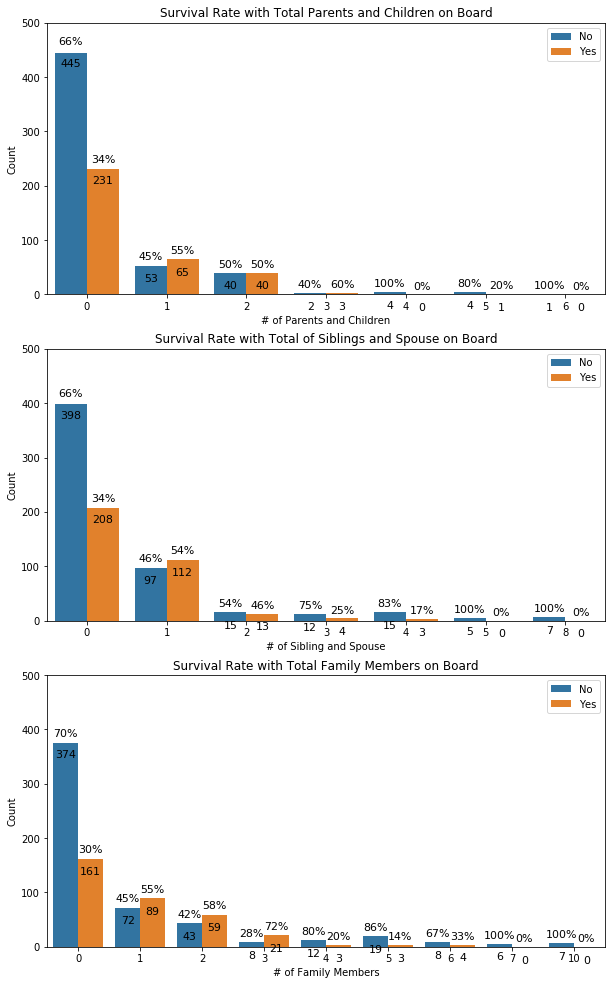

In [34]:
fig = plt.figure(figsize = (10,17))
ax1 = plt.subplot(3,1,1)
ax1 = sns.countplot(x = 'Parch', hue = 'Survived', data = train)
ax1.set_title('Survival Rate with Total Parents and Children on Board')
ax1.set_ylim(0,500)
ax1.set_xlabel('# of Parents and Children')
ax1.set_ylabel('Count')
ax1.legend(['No','Yes'],loc = 1)



height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax1.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax1.patches): 
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax1.text(p.get_x()+p.get_width()/2, height[i]*1.01 - 30,
           '{:.0f}'.format(height[i]), ha="center", size=11)

ax2 = plt.subplot(3,1,2)
ax2 = sns.countplot(x = 'SibSp', hue = 'Survived', data = train)
ax2.set_title('Survival Rate with Total of Siblings and Spouse on Board')
ax2.set_ylim(0,500)
ax2.set_xlabel('# of Sibling and Spouse')
ax2.set_ylabel('Count')
ax2.legend(['No','Yes'],loc = 1)
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax2.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax2.patches): 
    ax2.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax2.text(p.get_x()+p.get_width()/2, height[i]*1.01 - 30,
           '{:.0f}'.format(height[i]), ha="center", size=11)
    
ax3 = plt.subplot(3,1,3)
ax3 = sns.countplot(x = 'Family', hue = 'Survived', data = train)
ax3.set_title('Survival Rate with Total Family Members on Board')
ax3.set_ylim(0,500)
ax3.set_xlabel('# of Family Members')
ax3.set_ylabel('Count')
ax3.legend(['No','Yes'],loc = 1)
height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax3.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax3.patches): 
    ax3.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax3.text(p.get_x()+p.get_width()/2, height[i]*1.01 - 30,
           '{:.0f}'.format(height[i]), ha="center", size=11)

It seems like it just best to use Family feautre and group together some of the levels

In [35]:
def family_amount(number):
    if number > 1:
        return '2 or More'
    elif number == 1:
        return '1'
    else:
        return 'None'

In [36]:
train['Family'] =train['Family'].apply(lambda x : family_amount(x))
test['Family'] = test['Family'].apply(lambda x : family_amount(x))

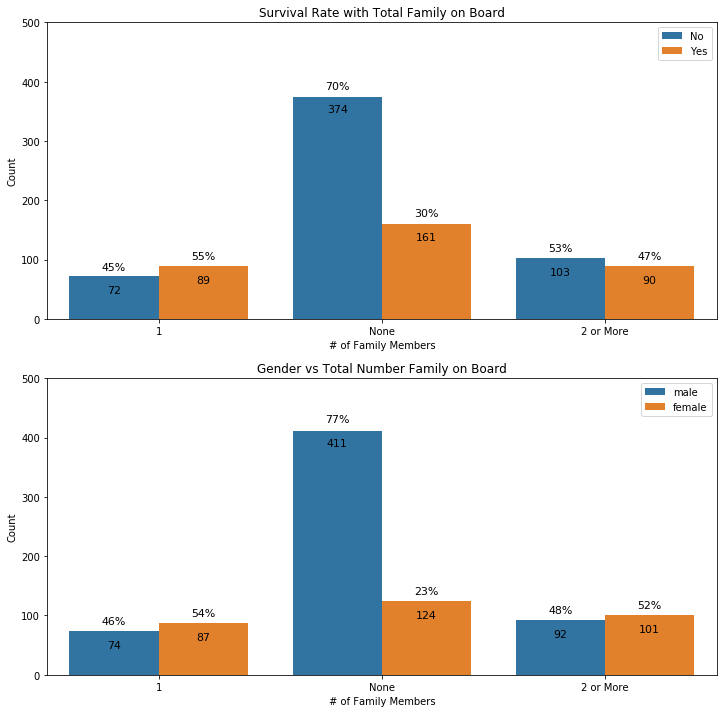

In [37]:
fig = plt.figure(figsize = (12,12))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x = 'Family', hue = 'Survived', data = train)
ax.set_title('Survival Rate with Total Family on Board')
ax.set_ylim(0,500)
ax.set_xlabel('# of Family Members')
ax.set_ylabel('Count')
ax.legend(['No','Yes'],loc = 1)



height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 - 30,
           '{:.0f}'.format(height[i]), ha="center", size=11)
    
ax2 = plt.subplot(2,1,2)
ax2 = sns.countplot(x = 'Family', hue = 'Sex', data = train)
ax2.set_title('Gender vs Total Number Family on Board')
ax2.set_ylim(0,500)
ax2.set_xlabel('# of Family Members')
ax2.set_ylabel('Count')
ax2.legend(loc = 1)
    

height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax2.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax2.patches): 
    ax2.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 10,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax2.text(p.get_x()+p.get_width()/2, height[i]*1.01 - 30,
           '{:.0f}'.format(height[i]), ha="center", size=11)

After seeing passengers with no family member on board having such a lower rate of surviving I added family members by sex and found that there were a lot more single men on board then women, which explains the large difference.

<a id='ticket'></a>
### Ticket 

In [38]:
train['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

It seems that we should scrap ticket. We could strip the prefix before each ticket, but Fare and Embarked may be a better use of our time and effort.

In [39]:
train = train.drop('Ticket', axis = 1)
test = test.drop('Ticket',axis =1)

<a id='fare'></a>
### Fare 

There is 1 missing value for Fare in the Test dataset

In [40]:
test['Fare'] = test.groupby(['Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))

In [41]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
Title            0
Family           0
dtype: int64

In [42]:
train['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

(0, 200)

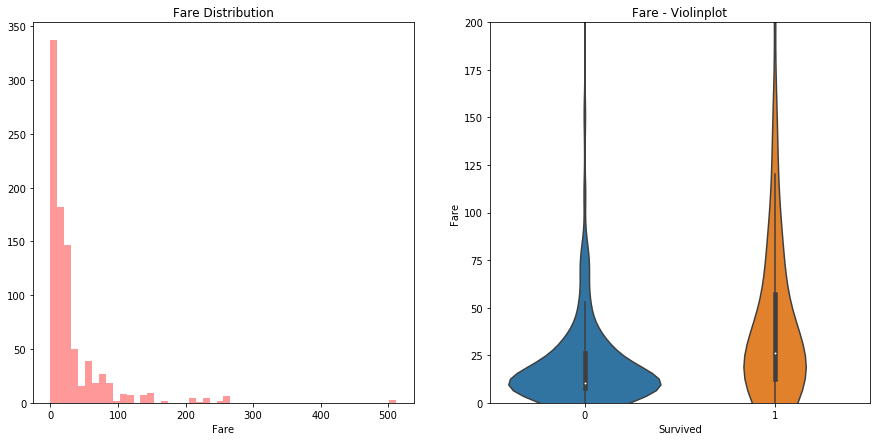

In [43]:
fig = plt.figure(figsize = (15,7))
ax1 = plt.subplot(1,2,1)
plt.title('Fare Distribution')
ax1 = sns.distplot(train['Fare'], kde = False, color='red')
ax2 = plt.subplot(1,2,2)
ax2 = sns.violinplot(x = 'Survived',y = 'Fare', data = train)
plt.title('Fare - Violinplot')
ax2.set_ylim(0,200)


In [44]:
train[['Fare','Survived']].groupby('Survived').mean()

,Fare
Survived,
0,22.117887
1,48.209498


<a id='cabin'></a>
### Cabin 

In [45]:
train.Cabin.fillna('Unknown',inplace=True)
test.Cabin.fillna('Unknown',inplace=True)

In [46]:
train['Cabin'].value_counts()

Unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
F2               3
F33              3
D                3
C22 C26          3
E101             3
B51 B53 B55      2
C124             2
D20              2
C92              2
C123             2
D33              2
B58 B60          2
E24              2
D36              2
C65              2
B20              2
E67              2
E33              2
C125             2
E121             2
C68              2
C2               2
F4               2
C93              2
C83              2
D35              2
              ... 
D48              1
C118             1
B38              1
B19              1
A6               1
C87              1
C62 C64          1
A16              1
E10              1
E50              1
C85              1
C110             1
C50              1
E31              1
D50              1
B71              1
C104             1
B78              1
B101             1
E58              1
E77              1
E68         

In [47]:
#Lets pull out the first letter of each row and replace that with the cabin
train['Cabin'] = train['Cabin'].map(lambda x: 'Cabin '+ x[0])
test['Cabin'] = test['Cabin'].map(lambda x: 'Cabin '+ x[0])

Cabin U    687
Cabin C     59
Cabin B     45
Cabin D     33
Cabin E     32
Cabin A     15
Cabin F     13
Cabin G      4
Cabin T      1
Name: Cabin, dtype: int64
Cabin U    327
Cabin C     35
Cabin B     18
Cabin D     13
Cabin E      9
Cabin F      8
Cabin A      7
Cabin G      1
Name: Cabin, dtype: int64


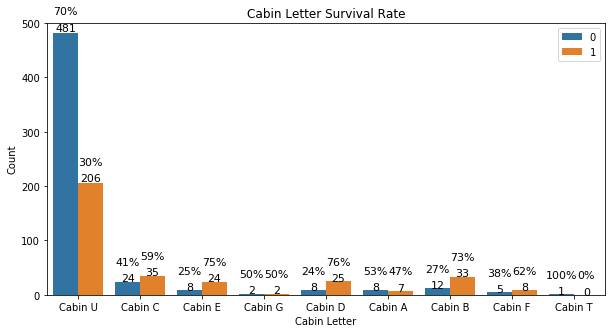

In [48]:
print(train['Cabin'].value_counts())
print(test['Cabin'].value_counts())
fig = plt.figure(figsize = (10,5))


ax = plt.plot()
ax = sns.countplot(x = 'Cabin', hue = 'Survived',data = train)
ax.set_title('Cabin Letter Survival Rate')
ax.set_ylim(0,500)
ax.set_xlabel('Cabin Letter')
ax.set_ylabel('Count')
ax.legend(loc = 1)
    

height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
           '{:.0f}'.format(height[i]), ha="center", size=11)

Any Cabin with less than 30 in the training set or 15 in the test set, will be grouped together.

In [49]:
grouped_cabins = ['Cabin T','Cabin G','Cabin F','Cabin A', 'Cabin D','Cabin E']
train['Cabin'] = train['Cabin'].apply(lambda x: 'Other Cabins' if x in grouped_cabins else x)
test['Cabin'] = test['Cabin'].apply(lambda x: 'Other Cabins' if x in grouped_cabins else x)

In [50]:
print(train['Cabin'].value_counts())
print(test['Cabin'].value_counts())

Cabin U         687
Other Cabins     98
Cabin C          59
Cabin B          45
Name: Cabin, dtype: int64
Cabin U         327
Other Cabins     38
Cabin C          35
Cabin B          18
Name: Cabin, dtype: int64


<a id='embarked'></a>
### Embarked 

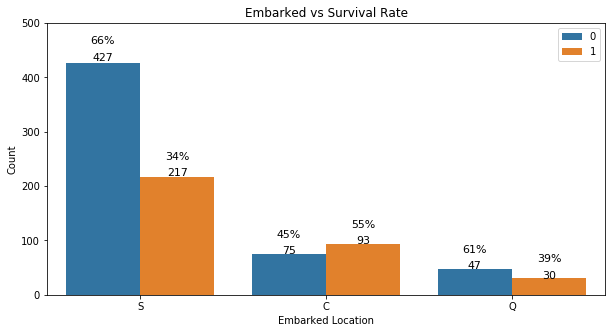

In [51]:
fig = plt.figure(figsize = (10,5))


ax = plt.plot()
ax = sns.countplot(x = 'Embarked', hue = 'Survived',data = train)
ax.set_title('Embarked vs Survival Rate')
ax.set_ylim(0,500)
ax.set_xlabel('Embarked Location')
ax.set_ylabel('Count')
ax.legend(loc = 1)
    

height = [p.get_height() if p.get_height()==p.get_height() else 0 for p in ax.patches]
ncol = int(len(height)/2)
total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
for i, p in enumerate(ax.patches): 
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01 + 30,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=11)
    ax.text(p.get_x()+p.get_width()/2, height[i]*1.01,
           '{:.0f}'.format(height[i]), ha="center", size=11)
    


<a id='preperation'></a>
## <font color = 'Blue'> Data Preperation</font>

In [52]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family
0,0,3,male,22.0,1,0,7.2500,Cabin U,S,Mr,1
1,1,1,female,38.0,1,0,71.2833,Cabin C,C,Mrs,1
2,1,3,female,26.0,0,0,7.9250,Cabin U,S,Miss,None
3,1,1,female,35.0,1,0,53.1000,Cabin C,S,Mrs,1
4,0,3,male,35.0,0,0,8.0500,Cabin U,S,Mr,None


We can drop the Sex column, becuase it will be have high multicollinearity with the titles

In [53]:
train = train.drop('Sex', axis=1)
test = test.drop('Sex', axis=1)

In [54]:
#Pclass Dummies
Pclass_dum_train = pd.get_dummies(train['Pclass'])
Pclass_dum_test  = pd.get_dummies(test['Pclass'])
Pclass_dum_train.columns = ['Class_1','Class_2','Class_3']
Pclass_dum_test.columns = ['Class_1','Class_2','Class_3']
Pclass_dum_train.drop(['Class_1'], axis=1, inplace=True)
Pclass_dum_test.drop(['Class_1'], axis=1, inplace=True)

train = train.join(Pclass_dum_train)
test  = test.join(Pclass_dum_test)

train.drop(['Pclass'], axis=1,inplace=True)
test.drop(['Pclass'], axis=1,inplace=True)


In [55]:
#Titles Dummies
title_dum_train  = pd.get_dummies(train['Title'])
title_dum_test  = pd.get_dummies(test['Title'])

train = train.join(title_dum_train)
test  = test.join(title_dum_test)

train.drop(['Title'], axis=1,inplace=True)
test.drop(['Title'], axis=1,inplace=True)

In [56]:
# Embarked Dummies

embarked_dum_train  = pd.get_dummies(train['Embarked'])
embarked_dum_test  = pd.get_dummies(test['Embarked'])
embarked_dum_train.drop(['S'], axis=1, inplace=True)
embarked_dum_test.drop(['S'], axis=1, inplace=True)

train = train.join(embarked_dum_train)
test  = test.join(embarked_dum_test)

train.drop(['Embarked'], axis=1,inplace=True)
test.drop(['Embarked'], axis=1,inplace=True)

In [57]:
# Cabin Dummies
cabin_dum_train = pd.get_dummies(train['Cabin'])
cabin_dum_test  = pd.get_dummies(test['Cabin'])

train = train.join(cabin_dum_train)
test  = test.join(cabin_dum_test)

train.drop(['Cabin'], axis=1,inplace=True)
test.drop(['Cabin'], axis=1,inplace=True)

In [58]:
Family_dum_train = pd.get_dummies(train['Family'])
Family_dum_test  = pd.get_dummies(test['Family'])

train = train.join(Family_dum_train)
test  = test.join(Family_dum_test)

train.drop(['Family'], axis=1,inplace=True)
test.drop(['Family'], axis=1,inplace=True)

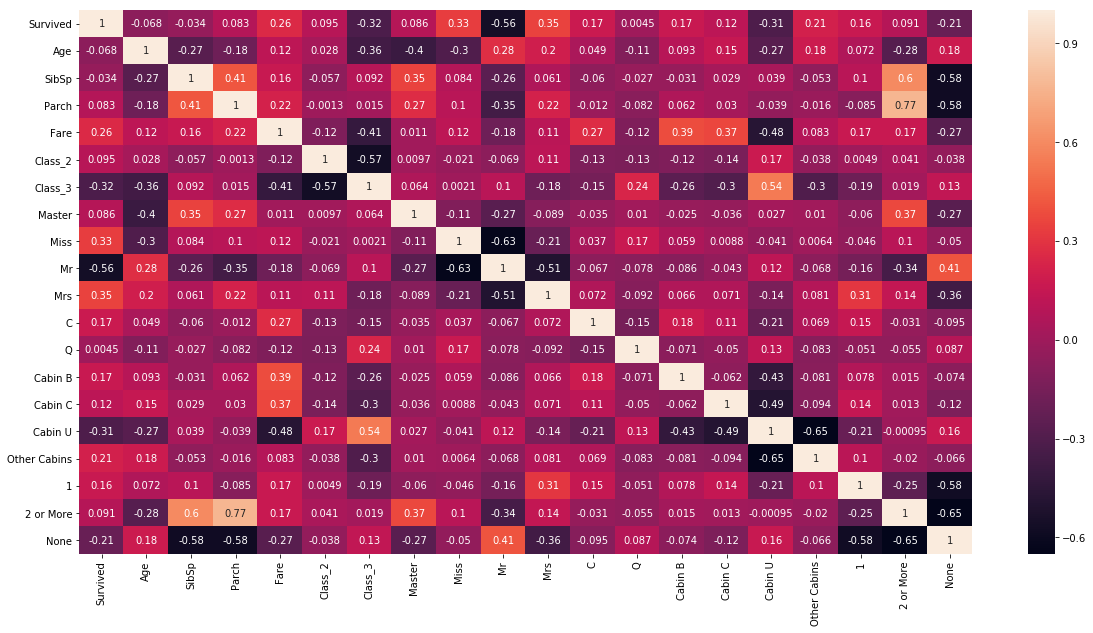

In [59]:
#Checking for collinearity. Cabin and Pclass seem highly correlated. We will remove Cabin
fig = plt.figure(figsize=(20,10))
fig = sns.heatmap(train.corr(), annot = True)

In [60]:
train.drop(['Mr', 'SibSp','None','Parch','Class_3','Cabin U'], axis=1,inplace=True)
test.drop(['Mr','SibSp','None','Parch','Class_3','Cabin U'], axis=1,inplace=True)

<a id= 'predictions'></a>
# <font color = blue>Data Predictions</font>

We will try to find the algorithm that gives us the highest accuracy. We will also do Logistic Regression so we can see coefficents for each feature.

In [61]:
test.head()

,PassengerId,Age,Fare,Class_2,Master,Miss,Mrs,C,Q,Cabin B,Cabin C,Other Cabins,1,2 or More
0,892,34.5,7.8292,0,0,0,0,0,1,0,0,0,0,0
1,893,47.0,7.0000,0,0,0,1,0,0,0,0,0,1,0
2,894,62.0,9.6875,1,0,0,0,0,1,0,0,0,0,0
3,895,27.0,8.6625,0,0,0,0,0,0,0,0,0,0,0
4,896,22.0,12.2875,0,0,0,1,0,0,0,0,0,0,1


In [62]:
train.head()

,Survived,Age,Fare,Class_2,Master,Miss,Mrs,C,Q,Cabin B,Cabin C,Other Cabins,1,2 or More
0,0,22.0,7.2500,0,0,0,0,0,0,0,0,0,1,0
1,1,38.0,71.2833,0,0,0,1,1,0,0,1,0,1,0
2,1,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0
3,1,35.0,53.1000,0,0,0,1,0,0,0,1,0,1,0
4,0,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0


In [63]:
# define training and testing splits
from sklearn.model_selection import train_test_split
X = train.drop('Survived', axis = 1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_true_test = test.drop('PassengerId', axis=1)

<a id = 'log'></a>
### Logistic Regression 

In [64]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=1, class_weight='balanced')
log_model.fit(X_train,y_train)
print(log_model.score(X_test, y_test))

y_pred_log = log_model.predict(X_true_test)

0.778911564626


In [65]:
from sklearn.linear_model import LogisticRegressionCV
logcv_model = LogisticRegressionCV(random_state=1,class_weight='balanced')
logcv_model.fit(X_train,y_train)
print(logcv_model.score(X_test, y_test))

y_pred_logcv = logcv_model.predict(X_true_test)

0.799319727891


<a id = 'en'></a>
### ElasticNet

In [66]:
from sklearn.linear_model import ElasticNetCV
encv_model = ElasticNetCV(l1_ratio=[.1,.3, .5, .7, .8,.9,.95, 1],alphas=[.0001,.001,.01,.1,1,10,100,1000],random_state=1)
encv_model.fit(X_train, y_train)
print(encv_model.score(X_test, y_test))

y_pred_encv = encv_model.predict(X_true_test)

0.449738659322


<a id = 'svc'></a>
### Support Vector Classifier

In [67]:
#Support Vector Classifier
#We compare the Support Vector with the Radial Basis Function kernel (default for SVC) and a linear SVC
from sklearn.svm import SVC
svc_rbf = SVC(random_state=1,class_weight='balanced')
svc_rbf.fit(X_train, y_train)
print(svc_rbf.score(X_test, y_test))

y_pred_svc_rbf = svc_rbf.predict(X_true_test)

0.700680272109


In [68]:
from sklearn.svm import LinearSVC
l_svc = LinearSVC(random_state=1,class_weight='balanced')
l_svc.fit(X_train, y_train)
print(l_svc.score(X_test, y_test))

y_pred_l_svc = l_svc.predict(X_true_test)

0.792517006803


<a id = 'rfc'></a>
### Random Forest Classifier

In [69]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

error_rate = []
for i in range(10,200,5):
    rfc = RandomForestClassifier(n_estimators=i, random_state=1, class_weight='balanced')
    rfc.fit(X_train, y_train)
    error_rate.append(rfc.score(X_test, y_test))

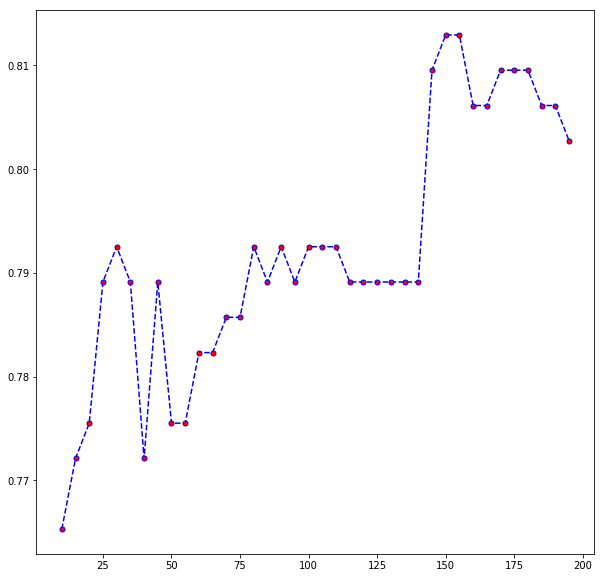

In [70]:
fig = plt.figure(figsize =(10,10))
plt.plot(range(10,200,5),error_rate, color = 'blue', linestyle = 'dashed',marker='o',markerfacecolor = 'red',markersize=5)

In [71]:
rfc = RandomForestClassifier(n_estimators=155, random_state=1,class_weight='balanced')
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

y_pred_rfc = rfc.predict(X_true_test)

0.812925170068


<a id = 'knn'></a>
### KNeighbors Classifier 

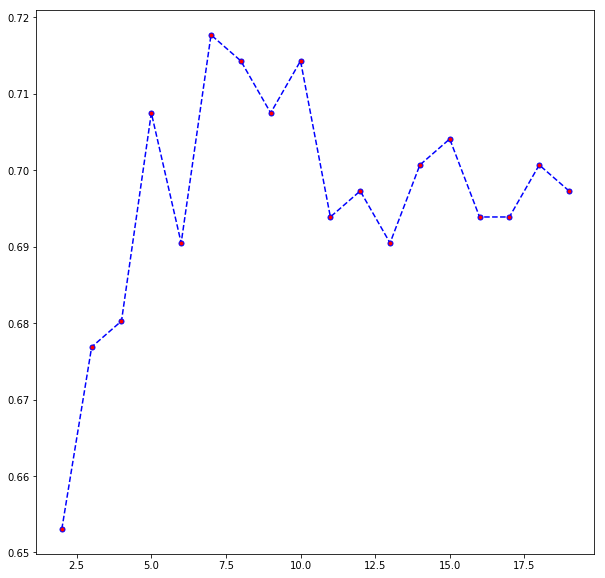

In [72]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(2,20,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    error_rate.append(knn.score(X_test, y_test))
fig = plt.figure(figsize =(10,10))
plt.plot(range(2,20,1),error_rate, color = 'blue', linestyle = 'dashed',marker='o',markerfacecolor = 'red',markersize=5)

In [73]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

y_pred = knn.predict(X_true_test)

0.71768707483


<a id = 'coeff'></a>
### Coefficient Estimates 

In [74]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = pd.Series(logcv_model.coef_[0])

# preview
coeff_df.sort_values(by='Coefficient Estimate', ascending=False)

,Features,Coefficient Estimate
5,Mrs,3.111155
3,Master,2.871617
4,Miss,2.316349
10,Other Cabins,1.666243
8,Cabin B,1.639578
9,Cabin C,1.233939
6,C,0.989035
2,Class_2,0.704146
7,Q,0.261607
1,Fare,0.004475


<a id = 'importance'></a>
### Random Forest's Features' Important

In [75]:
fi_df = pd.DataFrame()
fi_df['Features'] =  X_train.columns
fi_df['Importantances'] = rfc.feature_importances_
fi_df.sort_values(by='Importantances', ascending=False)

,Features,Importantances
1,Fare,0.316198
0,Age,0.281169
4,Miss,0.104621
5,Mrs,0.090241
6,C,0.031745
2,Class_2,0.030600
10,Other Cabins,0.028100
12,2 or More,0.026217
11,1,0.025931
7,Q,0.021860


<a id = 'test'></a>
# <font color = 'blue'> Test Dataset Predictions</font>

The Logistic Regression had the highest score with **0.861** so we will submit the random forest predictions

In [76]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_rfc
    })
submission.to_csv('titanic.csv', index=False)